In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df=pd.read_csv('gemstone.csv')
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [57]:
df. head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [58]:
df.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681
193572,193572,0.71,Good,E,SI2,60.8,64.0,5.73,5.71,3.48,2258


In [59]:
df.shape

(193573, 11)

In [60]:
df.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [61]:
df.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [62]:
df.drop(['id'],axis=1,inplace=True)

In [63]:
df.corr(numeric_only=True)

,carat,depth,table,x,y,z,price
carat,1.000000,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
depth,0.027852,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.225737,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,0.980563,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,0.980161,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.974274,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,0.943396,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


<Axes: >

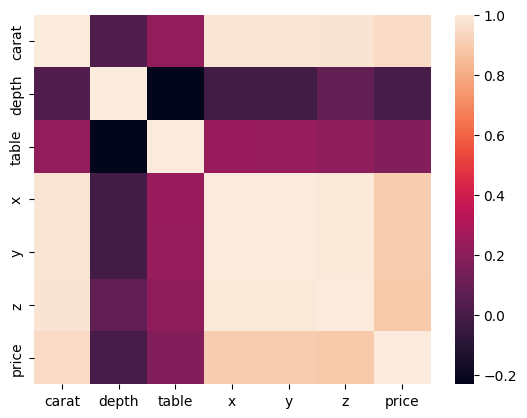

In [64]:
sns.heatmap(df.corr(numeric_only=True))

In [65]:
from scipy.stats import chi2_contingency
for col in ['carat','cut','clarity','depth','x','y','z','table']:
    table = pd.crosstab(df[col], df['price'])
    _, p, _, _ = chi2_contingency(table)
    print(f"{col}: p-value = {p:.4f} → {'Significant' if p < 0.05 else 'Not Significant'}")

carat: p-value = 0.0000 → Significant
cut: p-value = 0.0000 → Significant
clarity: p-value = 0.0000 → Significant
depth: p-value = 0.0000 → Significant
x: p-value = 0.0000 → Significant
y: p-value = 0.0000 → Significant
z: p-value = 0.0000 → Significant
table: p-value = 0.0000 → Significant


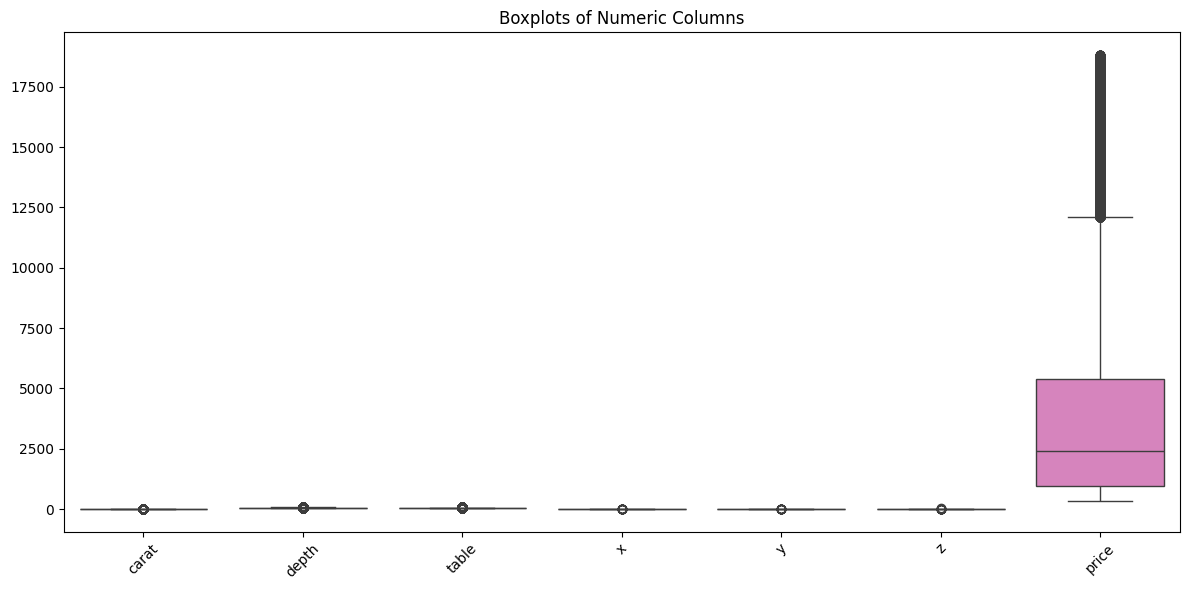

In [66]:
#checking outliers

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Columns')
plt.tight_layout()
plt.show()

In [67]:
outliers_dict = {}

for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outliers_dict[col] = outliers.shape[0]  # or list of indices: outliers.index.tolist()

# Print count of outliers per column
for col, count in outliers_dict.items():
    print(f"{col}: {count} outliers")

carat: 7653 outliers
depth: 9930 outliers
table: 4366 outliers
x: 17 outliers
y: 14 outliers
z: 18 outliers
price: 12649 outliers


In [68]:
# removing outliers

for col in df.select_dtypes(include='number').columns:
    # if col == 'stroke':
    #     continue  # skip the target column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [69]:
df.shape

(166266, 10)

In [70]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

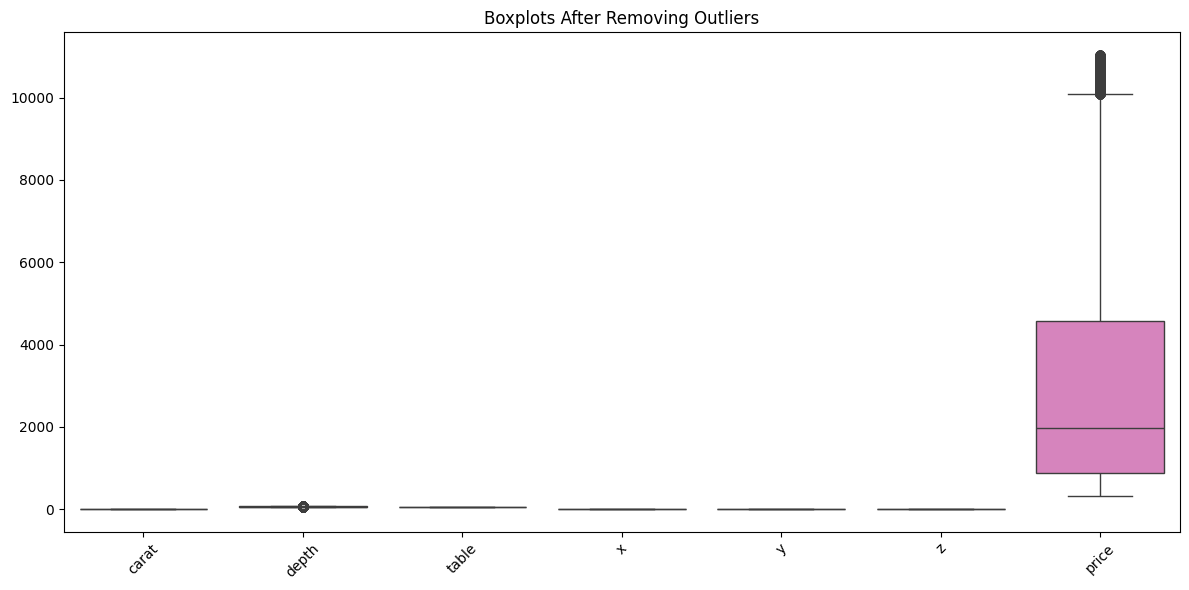

In [82]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=45)
plt.title('Boxplots After Removing Outliers')
plt.tight_layout()
plt.show()

In [71]:
dfe=pd.get_dummies(df[['cut','color','clarity']],drop_first=True,dtype=int)
dfe

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
2,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
5,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193567,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
193568,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
193569,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
193570,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0


In [72]:
df_1=pd.concat([dfe,df],axis=True)

In [73]:
df_1.drop(['cut','color','clarity','table','depth'],axis=1,inplace=True)

In [74]:
df_1

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,...,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,x,y,z,price
2,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0.70,5.69,5.73,3.50,2772
3,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0.32,4.38,4.41,2.71,666
5,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1.51,7.34,7.29,4.59,7506
6,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.74,5.76,5.79,3.57,3229
7,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1.34,7.00,7.05,4.38,6224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193567,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.58,5.33,5.36,3.31,1872
193568,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.31,4.35,4.39,2.67,1130
193569,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0.70,5.75,5.77,3.47,2874
193570,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0.73,5.72,5.75,3.62,3036


In [75]:
x=df_1.drop(['price'],axis=1)
x

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,...,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,x,y,z
2,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0.70,5.69,5.73,3.50
3,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0.32,4.38,4.41,2.71
5,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1.51,7.34,7.29,4.59
6,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.74,5.76,5.79,3.57
7,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1.34,7.00,7.05,4.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193567,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.58,5.33,5.36,3.31
193568,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.31,4.35,4.39,2.67
193569,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0.70,5.75,5.77,3.47
193570,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0.73,5.72,5.75,3.62


In [76]:
y = df_1['price']
y

2         2772
3          666
5         7506
6         3229
7         6224
          ... 
193567    1872
193568    1130
193569    2874
193570    3036
193571     681
Name: price, Length: 166266, dtype: int64

In [77]:
#Traininig and testing the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=42)
x_train
x_test


,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,...,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,x,y,z
181958,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0.70,5.70,5.73,3.52
115489,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0.31,4.34,4.31,2.69
54743,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1.00,6.47,6.43,3.97
99465,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0.30,4.32,4.34,2.68
108002,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0.90,6.07,6.15,3.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184807,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0.52,5.15,5.18,3.22
181935,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0.54,5.27,5.21,3.21
143109,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1.17,6.79,6.85,4.15
138370,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0.72,5.73,5.76,3.56


In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([2315.41619976,  500.25226065, 5142.60641873, ..., 7600.64170475,
       1749.9862231 , 5791.24370691], shape=(49880,))

In [79]:
#data frame
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
181958,2131,2315.416200
115489,698,500.252261
54743,5387,5142.606419
99465,1013,843.890632
108002,3275,4331.551949
...,...,...
184807,1429,1421.096717
181935,1243,1149.656776
143109,8400,7600.641705
138370,2318,1749.986223


In [80]:
#difference between actual and predicted values
df1['Difference'] = df1['Actual'] - df1['Predicted']
df1['Difference']

181958    -184.416200
115489     197.747739
54743      244.393581
99465      169.109368
108002   -1056.551949
             ...     
184807       7.903283
181935      93.343224
143109     799.358295
138370     568.013777
178652    1419.756293
Name: Difference, Length: 49880, dtype: float64

In [81]:
#performance evaluation methods
#mean absolute error
from sklearn import metrics

print('mean absolute percentage error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#R2 score
from sklearn.metrics import r2_score
print('R2 Score:', r2_score(y_test, y_pred))


mean absolute percentage error: 0.2617591096146011
Mean Squared Error: 429642.3123682323
Root Mean Squared Error: 655.4710614269957
R2 Score: 0.9374407350708115
